# Классификация заемщиков линейными моделями

## курс "Машинное обучение 1", программа AIMasters, 2022

## Студент: Бабаев Фуад Азер оглы

## Формулировка задания
Данное задание направлено на ознакомление с линейными моделями и градиентными методами обучения. В
задании необходимо: <br>
1. Написать на языке Python собственную реализацию линейного классификатора с произвольной функцией потерь и реализацию функции и градиента функции потерь для логистической регрессии. Реализации можно частично проверить через юнит-тесты и с помощью системы ejudge в соответствующем соревновании. <br><br> **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения. 


2. Вывести все необходимые формулы, привести выкладки в отчёте. 


3. Провести описанные ниже эксперименты с модельными данными и приложенным датасетом в данном ноутбуке. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно. <br><br> **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать: `File -> Download as -> HTML (.html)`. Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de). Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями. <br><br> Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.


## Теоретическая часть (1 балл)
Выведите формулу градиента функции потерь (по параметру $w$) для задачи бинарной логистической регрессии. <br>
Считайте для удобства, что $x[0] = 1$ для любого объекта, то есть $w[0] - \texttt{bias}$. <br>
Так, в выведенном вами градиенте, $\texttt{grad}[1:]$ - градиент по весам, $\texttt{grad}[0]$ - градиент по $\texttt{bias}$.

$$L(a(x), y) = \log(1 + \exp(-y\langle w, x\rangle)), \quad y \in \{-1, 1\}$$

Запишите вывод градиента ниже.

In [2]:
import sympy as sp

w, y, x = sp.symbols('w y x')
L = sp.log(1 + sp.exp(-y * w * x))
grad_L_w = sp.diff(L, w)

print(f"Градиент функции потерь по весам : dL/dw = {grad_L_w}")

Градиент функции потерь по весам : dL/dw = -x*y*exp(-w*x*y)/(1 + exp(-w*x*y))


Тогда в векторной форме имеем $$\nabla_w L = -\frac{\mathbf{x}^T y \exp(-y \mathbf{x} \times \mathbf{w})}{1 + \exp(-y \mathbf{x} \times \mathbf{w})}$$

### Проверка формулы

In [3]:
import numpy as np

In [4]:
def func(X, y, w):
        """
        Get loss function value at w for each sample.
        """

        return np.log(1 + np.exp(-y * (X @ w)))

def grad(X, y, w):
    """
    Get loss function gradient value at w.
    """

    return -(X.T @ (y * np.exp(-y * (X @ w)) / (1 + np.exp(-y * (X @ w)))))

def compare_num_vs_analytical(X, y, w, epsilon = 10 **(-10)):
    analytical_grad = grad(X, y, w)
    numerical_grad = np.zeros(w.shape)
    for i in range(len(w)):
        w_plus = w.copy()
        w_plus[i] += epsilon
        f_plus = np.sum(func(X, y, w_plus))
        f_minus = np.sum(func(X, y, w))
        numerical_grad[i] = (f_plus - f_minus) / epsilon
    
    print(f"Analytical grad : {analytical_grad}")
    print(f"Numerical grad : {numerical_grad}")
    print(f"Norm of the dif : {np.linalg.norm(analytical_grad - numerical_grad)}")

n_samples = 10
X_test = np.random.randn(n_samples, n_samples)
y_test = np.random.choice([-1, 1], size=n_samples) 
w_test = np.random.randn(n_samples)

compare_num_vs_analytical(X_test, y_test, w_test)

Analytical grad : [ 3.12121587 -4.17981988 -0.89919108 -0.98559947 -1.25862795  3.56179527
  2.3334656  -2.28955734 -0.74852093 -6.25611071]
Numerical grad : [ 3.12130766 -4.17969659 -0.8991563  -0.9855583  -1.25858435  3.56184415
  2.33352893 -2.2895108  -0.74848572 -6.2560801 ]
Norm of the dif : 0.0001979247603647952


## Реализация алгоритмов (4 баллов)
Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить все
тесты. Задание, не проходящее все тесты, приравнивается к невыполненному. 


При написании необходимо пользоваться стандартными средствами языка Python, библиотеками `numpy, scipy и matplotlib`. Библиотекой `scikit-learn` для реализации модели пользоваться запрещается, но разрешается использовать её в процессе экспериментов. Все
подробности реализации алгоритмов подробно описаны в спецификации к заданию.


Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые тесты, которые находятся в модуле `modules`. Чтобы запустить тесты в консоли требуется выполнить команду:
```c
$ pytest ./modules/tests.py

```

Разрешается дополнять файл тестами для самопроверки. Доп баллы за написание своих тестов не будет :)

## Эксперименты (10 баллов)

Эксперименты будем проводить на [датасете](https://www.kaggle.com/competitions/home-credit-default-risk/overview) по классификации заемщиков на плохих (target = 1: клиент с "payment difficulties") и хороших (target = 0: все остальные). Для экспериментов будем использовать лишь основной файл `application_train.csv`, а также перекодируем таргет в метки -1, 1.

Описание колонок находится в файле `description.csv`.

Для начала мы за вас считаем данные и поделим на обучение, валидацию и тест случайным образом.

In [5]:
import numpy as np, pandas as pd

%load_ext autoreload
%autoreload 2

# %load_ext - https://ipython.readthedocs.io/en/stable/interactive/magics.html
# %autoreload - https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

data = pd.read_csv('data/application_train.csv')
data.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in data.columns]

data.target = data.target.map({0: -1, 1: 1})

from IPython.display import display

print('\ntarget value_counts:')
display(data['target'].value_counts(dropna=False))

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

data.head(3)


target value_counts:


-1    282686
 1     24825
Name: target, dtype: int64

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,...,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,-1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,-1,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Preprocessing

По заданию этот момент игнорировался, но я хотел дополнить исследование большим количеством фичей, если рассматривать только чиловые, то отпадают такие, на мой взгляд важные, фичи как: наличие машины, наличие недвижимости, пол и т.д.

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore')

def data_preprocessing(data, max_unique_values=10):
    processed_data = data.copy()
    
    # Encoding
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    imputer = SimpleImputer(strategy='most_frequent')
    
    for column in processed_data.columns:
        if processed_data[column].dtype == 'object' and processed_data[column].nunique() <= max_unique_values:
            encoded = ohe.fit_transform(processed_data[[column]])
            encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names([column]))
            encoded_df.index = processed_data.index
            processed_data = processed_data.drop(column, axis=1)
            processed_data = processed_data.join(encoded_df)
        elif processed_data[column].dtype in ['int64', 'float64']:
            processed_data[column] = imputer.fit_transform(processed_data[[column]])
    
    return processed_data

preprocessed_data = data_preprocessing(data)

In [24]:
np.random.seed(911)
data = preprocessed_data.copy()

test_size = int(0.2 * data.shape[0]) #*! почему 0.2?
val_size = int(0.3 * (data.shape[0] - test_size)) #*! почему 0.3?
test_idx = np.random.choice(data.shape[0], size=test_size, replace=False)

val_idx_candidates = np.setdiff1d(np.arange(data.shape[0]), test_idx)
val_idx = np.random.choice(val_idx_candidates, size=val_size, replace=False)

data_dict = dict()
data_dict['tst'] = data.loc[test_idx].reset_index(drop=True)
data_dict['val'] = data.loc[val_idx].reset_index(drop=True)

not_train_idx = np.union1d(test_idx, val_idx)
data_dict['tr'] = data.drop(index=not_train_idx)
data_dict['tr'].reset_index(drop=True, inplace=True)

for key, df in data_dict.items():
    print(key, 'shape:', df.shape)

tst shape: (61502, 177)
val shape: (73802, 177)
tr shape: (172207, 177)


**Неожиданная заметка №1**

В силу сильной несбалансированности классов (-1 в 10 раз больше чем 1), лучше было сделать <span style="color:green">стратифицированное сэмплирование</span>.

Но в целом разбиение на такие большие сэмплы для трэин/теста/вал должно включать в себя почти исходную пропорцию классов. 

Давайте проверим это.

In [8]:
print('Original dataset calss proportions')
display(data['target'].value_counts(normalize=True, dropna=False))
for key, df in data_dict.items():
    print(f"{key} class proportions:")
    print(df['target'].value_counts(normalize=True))

Original dataset calss proportions


-1    0.919271
 1    0.080729
Name: target, dtype: float64

tst class proportions:
-1    0.920588
 1    0.079412
Name: target, dtype: float64
val class proportions:
-1    0.919203
 1    0.080797
Name: target, dtype: float64
tr class proportions:
-1    0.91883
 1    0.08117
Name: target, dtype: float64


### Часть первая. Погружаемся в "зону адекватности" гиперпараметров

Будем считать, для начала, что мы провели какую-то предобработку данных, и теперь мы готовы обучать на них нашу модель. Гиперпараметрами, которые хочется подобрать, являются `step_alpha`, `step_beta`, `batch_size`, `l2_coef`. Будем двигаться к тому, чтобы поизучать, как связаны между собой первые три. Для этого нужно зафиксировать коэффициент l2-регуляризации лосса на каком-нибудь адекватном значении. Будем использовать `optuna`, чтобы его выяснить (см. семинар про optuna).

Напишите ниже свою `objective_function`, которую в дальнейшем будем оптимизировать. Перебираемые гиперпараметры даны выше; подумайте, как лучше задать их распределения. Положите `tolerance = 2e-4, max_iter = 30, random_seed = 911`. 

В качестве меры качества предлагается использовать ваш реализованный `BinaryLogisticLoss` на валидации без учета слагаемого, отвечающего за регуляризацию.

**Совет:** не включайте значения `batch_size` сильно меньше 300, это приведет к очень долгому времени одной эпохи. <br>

In [9]:
import optuna

from modules.linear_model import LinearModel
from modules.losses import BinaryLogisticLoss

def objective(trial, X_tr, y_tr, X_val, y_val):
    step_alpha = trial.suggest_float('step_alpha', 1e-4, 1e-1, log=True)
    step_beta = trial.suggest_float('step_beta', 0.01, 1.0, log=True)
    batch_size = trial.suggest_categorical('batch_size', [300, 600, 900, 1200])
    l2_coef = trial.suggest_float('l2_coef', 1e-5, 1e-1, log=True)

    loss_function = BinaryLogisticLoss(l2_coef=l2_coef)
    linear_model = LinearModel(
        loss_function=loss_function,
        batch_size=batch_size,
        step_alpha=step_alpha,
        step_beta=step_beta,
        tolerance=2e-4,
        max_iter=30,
        random_seed=911
    )

    linear_model.fit(X_tr, y_tr, trace=False)
    val_loss = BinaryLogisticLoss(l2_coef=0).func(X_val, y_val, linear_model.w)

    return val_loss

0.8807970779778823
7.38905609893065


Напишите функцию `start_optimization`, запускающую сессию оптимизации, используя входные параметры для предобработки данных:

В ней создайте объект сессии оптимизации - `study` с `sampler=sampler`. Подготовьте ваш `objective_func` и данные (в качестве фичей по умолчанию будем использовать все числовые признаки, а обрабатывать данные по умолчанию будем минимальным простым пайплайном, приведенным ниже).

Функция должна возвращать `study`. <br>
Для простоты можете брать только признаки с типом `np.number`. <br>
**Совет:** Не забывайте указывать параметр `n_jobs` у `study.optimize`, чтобы ускорить эксперименты.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
    
def start_optimization(
    objective_func, # принимает trial, X_tr, y_tr, X_val, y_val, **other_objective_kwargs
    n_trials,
    n_jobs,
    data_dict,
    study_direction='minimize', 
    sampler=None, 
    features=None,
    fixed_l2_coef=None, 
    fixed_batch_size=None,
    **other_objective_kwargs
):
    # Prepare pipeline
    prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median')
    )
    
    if features is None:
        if 'sk_id_curr' in data.columns:
            features = data.select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns
        else:
            features = data.select_dtypes(np.number).drop(columns=['target']).columns
    
    # Prepare datasets
    X_tr = prep.fit_transform(data_dict['tr'][features])
    y_tr = data_dict['tr']['target'].values
    X_val = prep.transform(data_dict['val'][features])
    y_val = data_dict['val']['target'].values
    
    study = optuna.create_study(direction=study_direction, sampler=sampler)
    
    if fixed_l2_coef is not None and fixed_batch_size is not None:
        # This case is for fixed hyperparameters considered further
        study.optimize(
            lambda trial: objective_func(trial, X_tr, y_tr, X_val, y_val, l2_coef=fixed_l2_coef, batch_size=fixed_batch_size, **other_objective_kwargs),
            n_trials=n_trials, n_jobs=n_jobs
        )
    else:
        study.optimize(
            lambda trial: objective_func(trial, X_tr, y_tr, X_val, y_val, **other_objective_kwargs),
            n_trials=n_trials, n_jobs=n_jobs
        )
    
    return study

Запустите процесс оптимизации с `TPESampler`, предварительно настроив, как минимум, `n_startup_trials`; подумайте, какое `n_trials` выбрать.

In [11]:
n_trials = 100  # I've chosen 100 trials, based on my PC resources
sampler = optuna.samplers.TPESampler(n_startup_trials=10)
study = start_optimization(
    objective_func=objective,  
    n_trials=n_trials,
    n_jobs=-1,  
    data_dict=data_dict,  
    study_direction='minimize',  
    sampler=sampler,  
    features=None  
)

print(f"Best trial loss: {study.best_trial.value}")
print(f"Best trial hyperparameters: {study.best_trial.params}")

[I 2023-11-20 14:13:06,674] A new study created in memory with name: no-name-b6d861df-3381-464b-b532-a3ab45d7ed4a
[I 2023-11-20 14:14:51,273] Trial 4 finished with value: 0.2550767366520874 and parameters: {'step_alpha': 0.09765309199517958, 'step_beta': 0.01791639993811146, 'batch_size': 300, 'l2_coef': 7.071600723288997e-05}. Best is trial 4 with value: 0.2550767366520874.
[I 2023-11-20 14:14:51,284] Trial 10 finished with value: 0.2522438260308829 and parameters: {'step_alpha': 0.07142714788872671, 'step_beta': 0.01273251850987556, 'batch_size': 300, 'l2_coef': 0.00037758726112409216}. Best is trial 10 with value: 0.2522438260308829.
[I 2023-11-20 14:14:55,973] Trial 5 finished with value: 0.2607835606571414 and parameters: {'step_alpha': 0.01195135883827546, 'step_beta': 0.08919239926945363, 'batch_size': 900, 'l2_coef': 0.07504002205412023}. Best is trial 10 with value: 0.2522438260308829.
[I 2023-11-20 14:14:56,000] Trial 0 finished with value: 3.7444767797716176 and parameters: 

Best trial loss: 0.25215734083608465
Best trial hyperparameters: {'step_alpha': 0.08171882172283086, 'step_beta': 0.010037372601432802, 'batch_size': 300, 'l2_coef': 0.0002577935540908147}


Визуализируйте результаты оптимизации с помощью `optuna.visualization.plot_slice`. 

In [12]:
from optuna.visualization import plot_slice

slice_plot = plot_slice(study)
slice_plot.show()

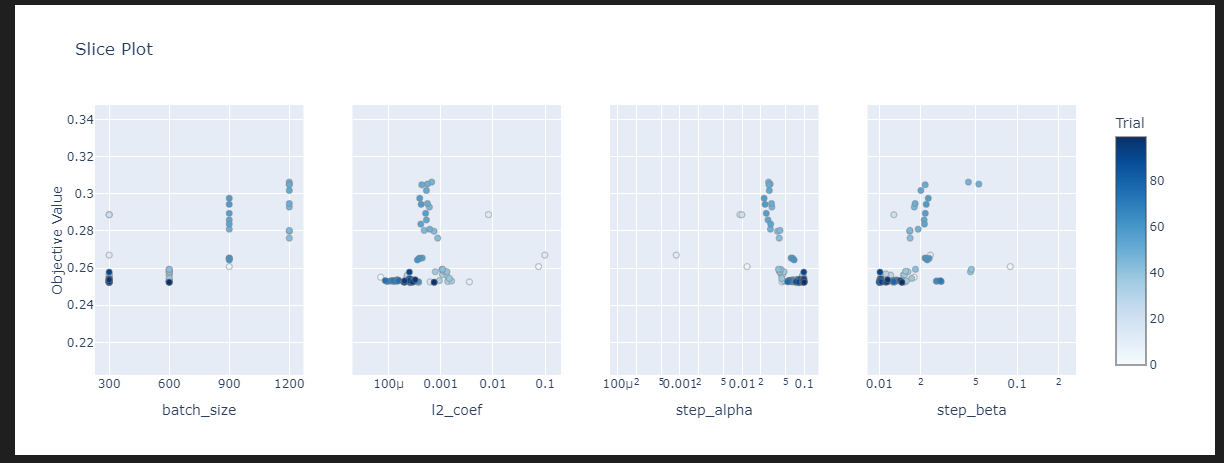

Опишите свои наблюдения. Если наблюдать вам мешает кривой масштаб графиков из-за слишком высоких значений лосса для некоторых trials, можно "зазумиться" в нужный интервал, выделяя на графике нужное подмножество точек или использовать аргумент `target`.

Можно заметить, что для l2, alpha, beta коэффициентов виден четкий паттерн по снижению потерь с уменьшением их значений. 

Также они группируются вблизи некоторого устойчивого значения. 

По результатам оптимизации batch_size невозможно точно выделить наиболее оптимальный. Результаты для всех батчей крайне близки. Однако размеры 300, 600 кажутся более оптимальными.

**Ответьте на вопросы:**

1) Почему не нужно включать слагаемое, отвечающее за регуляризацию, в подсчет лосса для подбора гиперпараметров?

Наша задача по подбору гиперпараметров нацелена на улучшение предсказаний, а не оптимизацию функции потерь.

Если бы мы оставили коэффициент регуляризации, то в целевой функции помимо оптимизации фита, еще пытались бы оптимизировать лосс.

2) Почему, если нашей целью является подбор адекватного коэффициента l2-регуляризации, мы включали в перебор остальные гиперпараметры?

1. Чтобы зафиксировать его, как было предложено ранее.

2. Потому что, оптимальное значение l2, в отрыве от других гперпараметров, не приводит нас к оптимальному набору в целом.

Давайте теперь посмотрим на то, что у нас получилось. Предлагается не сразу брать лучший по скору оптимизации `trial`, а сделать вывод, используя дополнительные данные.

  Используя график `plot_slice` выше и `study.trials`, выберите 3 лучших на ваш взгляд trial-кандидата для дальнейшего изучения.<br> Объясните ваш выбор. Если нужно, визуализируйте адекватным и наглядным образом вашу логику, чтобы проверяющий мог без труда в ней убедиться. 

In [13]:
# Будем брать лучшие 3 по значению целевой функции

completed_trials = [trial for trial in study.trials if trial.state == optuna.trial.TrialState.COMPLETE]
sorted_trials = sorted(completed_trials, key=lambda trial: trial.value)
best_three_trials = sorted_trials[:3]

print("Best 3 trials (from the best to the worst)")
for i, trial in enumerate(best_three_trials):
    print(f"Trial Number: {trial.number}")
    print(f"Value: {trial.value :.5f}")
    print(f"Params: {trial.params}")

Best 3 trials (from the best to the worst)
Trial Number: 84
Value: 0.25216
Params: {'step_alpha': 0.08171882172283086, 'step_beta': 0.010037372601432802, 'batch_size': 300, 'l2_coef': 0.0002577935540908147}
Trial Number: 10
Value: 0.25224
Params: {'step_alpha': 0.07142714788872671, 'step_beta': 0.01273251850987556, 'batch_size': 300, 'l2_coef': 0.00037758726112409216}
Trial Number: 98
Value: 0.25231
Params: {'step_alpha': 0.09769581544625831, 'step_beta': 0.014612859573223187, 'batch_size': 600, 'l2_coef': 0.0007526583367348668}


Обучите по модели на каждый из трех `trial`-кандидатов, собирая историю на обучении и валидации. Положите обученные модели и полученные истории в словари по ключу `trial.number`.

In [14]:
models = {}
histories = {}

# Train each of 3 models
for trial in best_three_trials:
    params = trial.params
    step_alpha = params['step_alpha']
    step_beta = params['step_beta']
    batch_size = params['batch_size']
    l2_coef = params['l2_coef']
    
    loss_function = BinaryLogisticLoss(l2_coef=l2_coef)
    model = LinearModel(
        loss_function=loss_function,
        batch_size=batch_size,
        step_alpha=step_alpha,
        step_beta=step_beta,
        tolerance=2e-4,
        max_iter=30,
        random_seed=911
    )
    
    # Prepare pipeline
    prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median')
    )
    
    features = data_dict['tr'].select_dtypes(include=[np.number]).drop(columns=['target']).columns
    
    # Prepare datasets
    X_tr = prep.fit_transform(data_dict['tr'][features])
    y_tr = data_dict['tr']['target'].values
    X_val = prep.transform(data_dict['val'][features])
    y_val = data_dict['val']['target'].values

    history = model.fit(X_tr, y_tr, trace=True, X_val=X_val, y_val=y_val)
    
    models[trial.number] = model
    histories[trial.number] = history

Напишите функцию `plot_trial_info`, которая выводит "информацию" о поданном `trial`. В эту "информацию" обязательно должно входить:
- График `feature - weight`, показывающий `top_k` признаков по модулю веса и их значения весов. Признаки должны идти по убыванию модуля веса.<br>Используйте `ax.barh`. <br> Используйте `ax.bar_label`, чтобы подписать веса к барам.<br> Используйте `ax.set_title(f'l2_coef: {l2_coef:.2e}', fontsize=15)` для этого графика.


- График "время обучения - лосс" - на обучении и валидации. Укажите "количество эпох | batch_size" в качестве title к этому графику. <br> Используйте `ax.plot`.


- Что угодно еще, что поможет вам принять решение о том, почему вы выберете один trial из этих трех.
<br><br>

Настройте размер графиков, шрифт, легенду. Убедитесь, что в вашей "информации" присутствует `trial.number, batch_size`. <br>
Визуализируйте выбранные вами trials. Убедитесь в адекватности графиков.

Можно пользоваться рисовалкой с семинара по линейным моделям.

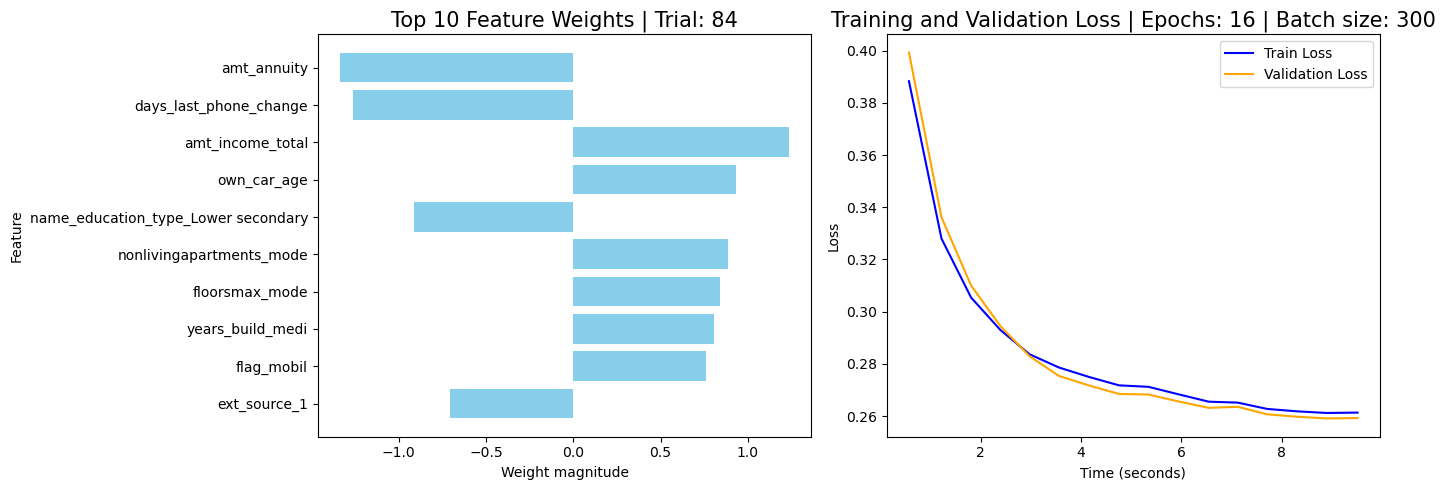

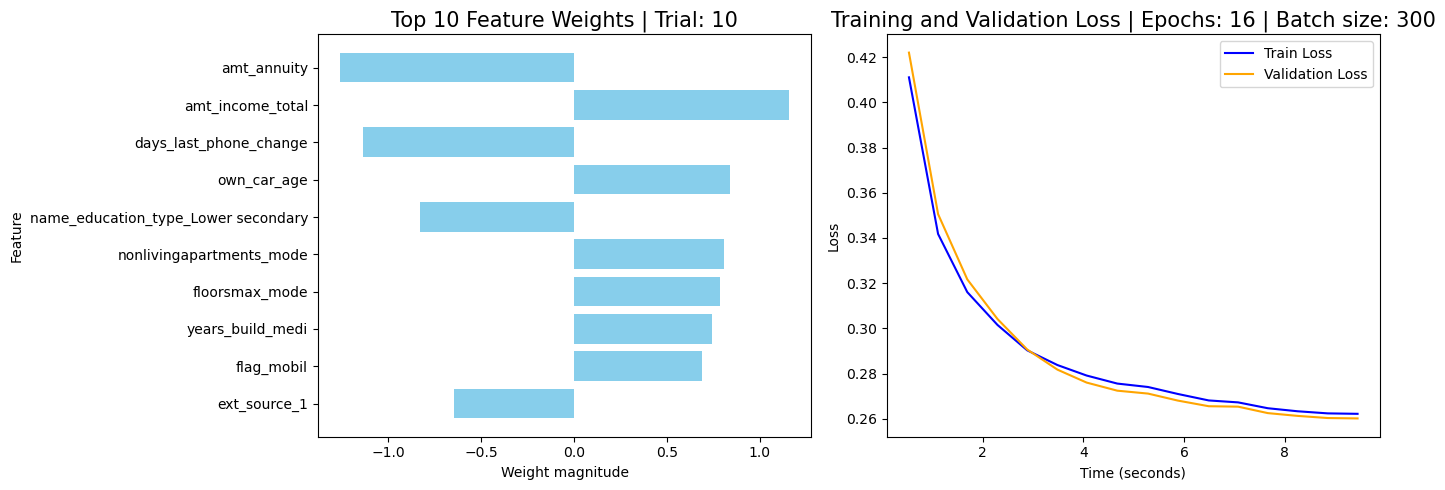

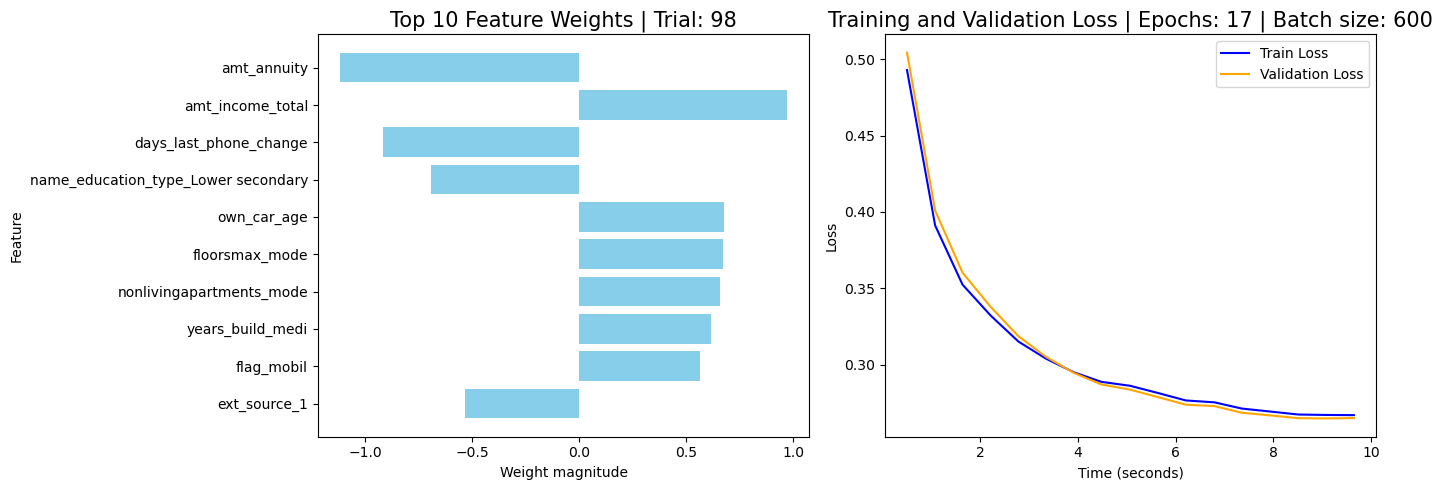

In [16]:
import matplotlib.pyplot as plt
def plot_trial_info(trial, models, feature_names, histories, top_k):
    model = models[trial.number]
    history = histories[trial.number]
    
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Feature weights plot
    weights = model.w[1:]
    feature_importance = np.abs(weights)
    top_indices = np.argsort(feature_importance)[-top_k:][::-1]
    top_features = [feature_names[i] for i in top_indices]
    top_weights = weights[top_indices]
    axs[0].barh(np.arange(top_k), top_weights, color='skyblue')
    axs[0].set_yticks(np.arange(top_k))
    axs[0].set_yticklabels(top_features)
    axs[0].invert_yaxis()
    axs[0].set_xlabel('Weight magnitude')
    axs[0].set_ylabel('Feature')
    axs[0].set_title(f'Top {top_k} Feature Weights | Trial: {trial.number}', fontsize=15)
    
    # Training and validation loss plot
    epochs = np.arange(len(history['func']))
    axs[1].plot(history['time'], history['func'], label='Train Loss', color='blue')
    axs[1].plot(history['time'], history['func_val'], label='Validation Loss', color='orange')
    axs[1].set_xlabel('Time (seconds)')
    axs[1].set_ylabel('Loss')
    axs[1].set_title(f'Training and Validation Loss | Epochs: {len(epochs)} | Batch size: {model.batch_size}', fontsize=15)
    axs[1].legend()

    plt.tight_layout()
    plt.show()


feature_names = data.columns
top_k = 10
for trial in best_three_trials:
    plot_trial_info(trial, models=models, feature_names=feature_names, histories=histories, top_k=top_k)


Опишите свои наблюдения. Если нужно, подключите визуализацию.

Наблюдается примерно одинаковый набор по важности фич. Отсутствует оверфит, лоссы трэина и валидационной выборки практически идентичны.

Какой в итоге коэффициент l2-регуляризации будем фиксировать для дальнейших экспериментов? <br>
Ответ объясните.

Зафиксируем коэффициент регуляризации, подобранный для trial - 84 ($l2\_coef: 0.0002578$), в силу того что данная модель имеет наименьший лосс, а также имеет лучшее время работы.

### Часть вторая. Research

Давайте зафиксируем выбранный коэффициент регуляризации и проведем несколько экспериментов с `step_alpha, step_beta, batch_size`. Но для начала посмотрим - возможно, нам удастся уменьшить размер признакового пространства без сильной потери качества, чтобы ускорить наши эксперименты.

Достаньте из словаря модель, соответствующую выбранному вами лучшему trial, и нарисуйте график отсортированных модулей ее весов.

*Неожиданная заметка №2*
Зачем нам отрисовывать feature importance, если можно просто на основе значений принять рещение об исключении.

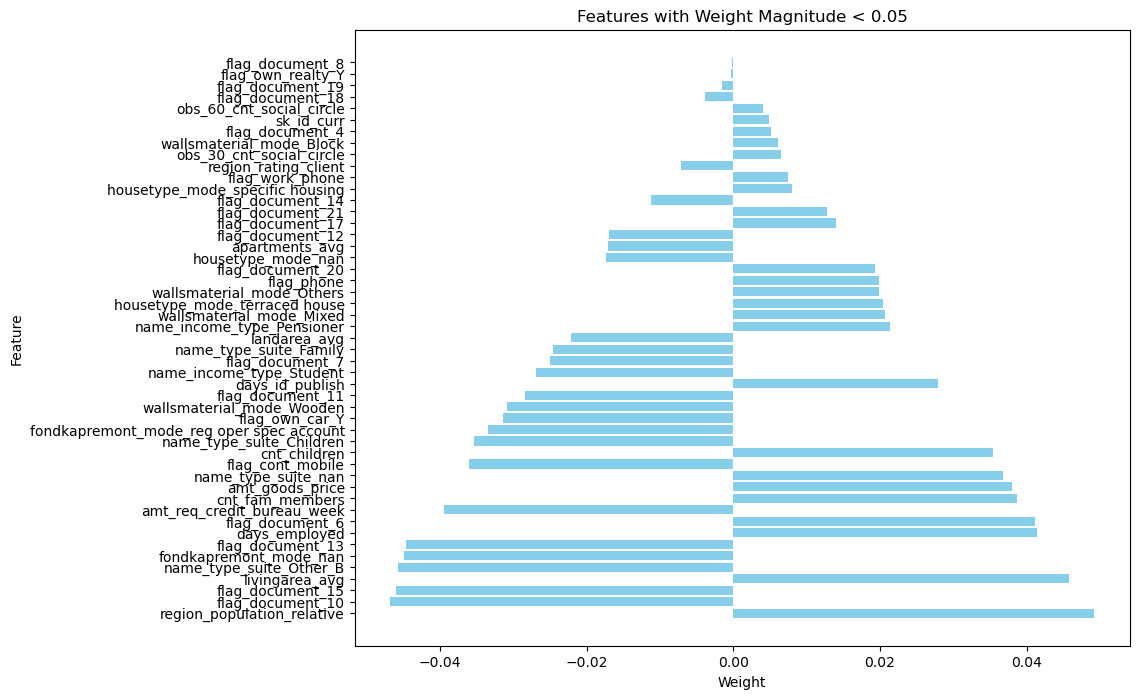

Features to exclude : ('region_population_relative', 'flag_document_10', 'flag_document_15', 'livingarea_avg', 'name_type_suite_Other_B', 'fondkapremont_mode_nan', 'flag_document_13', 'days_employed', 'flag_document_6', 'amt_req_credit_bureau_week', 'cnt_fam_members', 'amt_goods_price', 'name_type_suite_nan', 'flag_cont_mobile', 'cnt_children', 'name_type_suite_Children', 'fondkapremont_mode_reg oper spec account', 'flag_own_car_Y', 'wallsmaterial_mode_Wooden', 'flag_document_11', 'days_id_publish', 'name_income_type_Student', 'flag_document_7', 'name_type_suite_Family', 'landarea_avg', 'name_income_type_Pensioner', 'wallsmaterial_mode_Mixed', 'housetype_mode_terraced house', 'wallsmaterial_mode_Others', 'flag_phone', 'flag_document_20', 'housetype_mode_nan', 'apartments_avg', 'flag_document_12', 'flag_document_17', 'flag_document_21', 'flag_document_14', 'housetype_mode_specific housing', 'flag_work_phone', 'region_rating_client', 'obs_30_cnt_social_circle', 'wallsmaterial_mode_Block'

In [21]:
best_trial_number = 84
best_model = models[best_trial_number]

def plot_sorted_model_weights(model, feature_names, treshold = 0.05):
    weights = best_model.w[1:]
    feature_weights = [(feature, weight) for feature, weight in zip(feature_names, weights) if abs(weight) < treshold] # Let's plot features with weights less than 0.05
    feature_weights.sort(key=lambda x: abs(x[1]), reverse=True)
    features, weights = zip(*feature_weights)
    
    plt.figure(figsize=(10, 8))
    plt.barh(features, weights, color='skyblue')
    plt.xlabel('Weight')
    plt.ylabel('Feature')
    plt.title(f'Features with Weight Magnitude < {treshold}')
    plt.show()
    return features

features_to_exclude = plot_sorted_model_weights(best_model, feature_names)
print(f"Features to exclude : {features_to_exclude}")

Подумайте, можно ли убрать какую-то долю признаков? Если да, то какие признаки вы уберете для дальнейших экспериментов? <br>
Ответ объясните.

Основываясь на графике выше, мы можем исключить все фичи, влияние которых на предикт модели ничтожен (<0.05).
Список этих фичей приведен ниже. Причем, если исключение некоторых из них (например материал дома или день заключения контракта) мне понятны, то как может не влиять oww_realty или own_car, мне неясно. Фичи, которые мы исключили хранятся в переменной features_to_exclude. Исключено 49 фичей из 177.


In [26]:
data.drop(columns=list(features_to_exclude), inplace=True)

Напишите новую функцию `research_objective` для перебора `step_alpha, step_beta` при фиксированных `l2_coef, batch_size`. Остальные гиперпараметры оставьте без изменений с прошлого раза. Для перебора step_alpha используйте log-шкалу от 1e-3 до 20, для перебора step_beta - log-шкалу от 0.1 до 5.

Для `batch_size = 300, 1000, 10000` запустите по сессии оптимизации на выбранном вами множестве признаков, собирая каждый `study` в словарик по ключу batch_size. Используйте `n_trials = 200`, TPESampler с параметром `n_startup_trials = 100`.<br>

In [33]:
fixed_l2_coef = completed_trials[84].params['l2_coef']
fixed_batch_size = completed_trials[84].params['batch_size']

def research_objective(trial, X_tr, y_tr, X_val, y_val, batch_size, l2_coef):
    step_alpha = trial.suggest_float('step_alpha', 1e-3, 20, log=True)
    step_beta = trial.suggest_float('step_beta', 0.1, 5, log=True)
    fixed_batch_size = batch_size
    fixed_l2_coef = l2_coef

    loss_function = BinaryLogisticLoss(l2_coef=fixed_l2_coef)
    linear_model = LinearModel(
        loss_function=loss_function,
        batch_size=fixed_batch_size,
        step_alpha=step_alpha,
        step_beta=step_beta,
        tolerance=2e-4,
        max_iter=30,
        random_seed=911
    )

    linear_model.fit(X_tr, y_tr, trace=False)
    val_loss = BinaryLogisticLoss(l2_coef=0).func(X_val, y_val, linear_model.w)

    return val_loss

batch_sizes = [300, 1000, 10000]
studies = {}

for batch_size in batch_sizes:
    sampler = optuna.samplers.TPESampler(n_startup_trials=100)
    study = start_optimization(
        objective_func=research_objective,  
        n_trials=200,
        n_jobs=-1,  
        data_dict=data_dict,  
        study_direction='minimize',  
        sampler=sampler,  
        features=None,
        fixed_l2_coef=fixed_l2_coef, 
        fixed_batch_size=batch_size
    )
    studies[batch_size] = study

[I 2023-11-20 15:16:15,763] A new study created in memory with name: no-name-08cd508f-6408-48bb-96ff-7b053f494ced
[I 2023-11-20 15:17:48,468] Trial 3 finished with value: 0.42661024092080413 and parameters: {'step_alpha': 0.010296902017083876, 'step_beta': 0.8307410512623579}. Best is trial 3 with value: 0.42661024092080413.
[I 2023-11-20 15:17:48,639] Trial 9 finished with value: 0.2537090229617119 and parameters: {'step_alpha': 2.0551985957215644, 'step_beta': 3.745771098095418}. Best is trial 9 with value: 0.2537090229617119.
[I 2023-11-20 15:17:48,689] Trial 10 finished with value: 0.25329568086765913 and parameters: {'step_alpha': 0.06907878147583722, 'step_beta': 0.11784713414629991}. Best is trial 10 with value: 0.25329568086765913.
[I 2023-11-20 15:17:49,271] Trial 4 finished with value: 0.2571348970130776 and parameters: {'step_alpha': 0.5860194880933818, 'step_beta': 0.14742198205624288}. Best is trial 10 with value: 0.25329568086765913.
[I 2023-11-20 15:17:57,273] Trial 1 fi

Используя `optuna.visualization.plot_contour`, нарисуйте график зависимости `step_alpha - step_beta - objective`. Используйте аргумент `target`, чтобы обрезать значения лоссов, которые портят тепловую карту. <br>
Для каждого `batch_size` выведите такой график в отдельной ячейке.

Опишите свои наблюдения.

In [43]:
best_params_per_batch = {}
for batch_size, study in studies.items():
    print(f"Contour plot for batch size: {batch_size}")

    fig = optuna.visualization.plot_contour(
        study,
        params=['step_alpha', 'step_beta'],
        target=lambda t: min(t.value, 0.3)
    )

    best_trial = study.best_trial
    best_params = best_trial.params
    best_step_alpha = best_params['step_alpha']
    best_step_beta = best_params['step_beta']
    best_params_per_batch[batch_size] = (best_step_alpha, best_step_beta)
    # Print best parameters
    print(f"Batch Size: {batch_size}")
    print(f"Best step_alpha: {best_step_alpha}")
    print(f"Best step_beta: {best_step_beta}\n")

    fig.show()

Contour plot for batch size: 300
Batch Size: 300
Best step_alpha: 1.455867169522706
Best step_beta: 1.0654581714996096



Contour plot for batch size: 1000
Batch Size: 1000
Best step_alpha: 10.255508509069562
Best step_beta: 1.4073657708764575



Contour plot for batch size: 10000
Batch Size: 10000
Best step_alpha: 4.298661199867003
Best step_beta: 0.2989951629160006



Как видно из рисунка ниже (был выбран пример для одного батч сайза, но для других картинка похожая), данный график похож на "седло", большинство тчоек группируется вблизи минимума, чтобы точно определить, какие значения можно назвать лучшими, ивлечем их по наименьшему значению лосса.
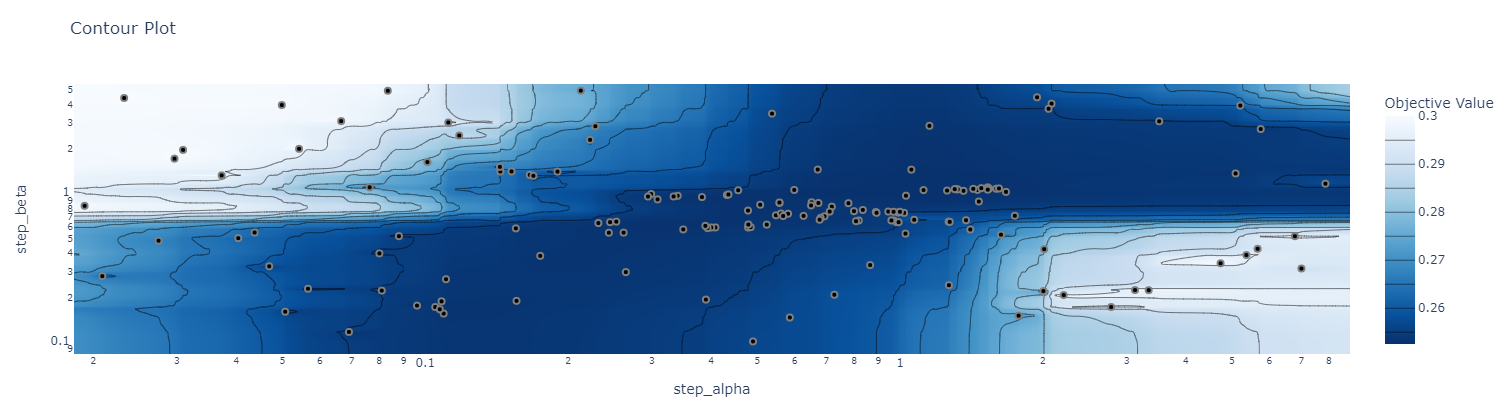

Обучите по модели для каждого `batch_size` с лучшими `step_alpha, step_beta`. Соберите историю, сложите все в словари по ключу batch_size.

In [44]:
models_histories = {}

for batch_size, (best_step_alpha, best_step_beta) in best_params_per_batch.items():
    model = LinearModel(
        loss_function=BinaryLogisticLoss(l2_coef=fixed_l2_coef),
        batch_size=batch_size,
        step_alpha=best_step_alpha,
        step_beta=best_step_beta,
        tolerance=2e-4,
        max_iter=30,
        random_seed=911
    )
    prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median')
    )
    
    features = data_dict['tr'].select_dtypes(include=[np.number]).drop(columns=['target']).columns
    
    X_tr = prep.fit_transform(data_dict['tr'][features])
    y_tr = data_dict['tr']['target'].values
    X_val = prep.transform(data_dict['val'][features])
    y_val = data_dict['val']['target'].values

    history = model.fit(X_tr, y_tr, trace=True, X_val=X_val, y_val=y_val)
    models_histories[batch_size] = {
        'model': model,
        'history': history
    }

Визуализируйте результаты эксперимента. Нарисуйте графики `time-loss`, `epoch-loss`, `epoch-learning_rate`. <br>
На графике `epoch-loss` должно быть каким-либо образом отображено среднее время эпохи для каждого размера батча. <br>
Под `learning_rate` имеется в виду:
$$\eta_k  = \frac{\alpha}{k^{\beta}}, \quad \text{где $k$ - номер итерации (эпохи)}$$

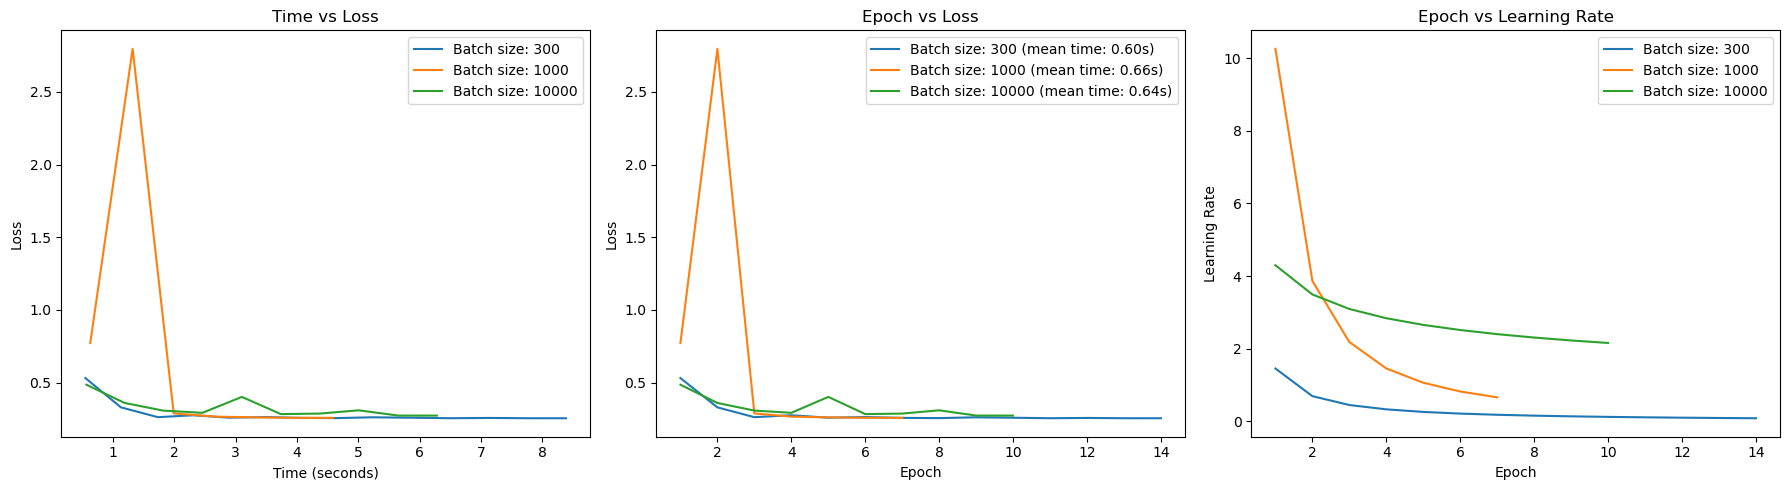

In [47]:
def plot_experiment_results(models_histories):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    for batch_size, info in models_histories.items():
        history = info['history']
        epochs = np.arange(1, len(history['func']) + 1)
        step_alpha = info['model'].step_alpha
        step_beta = info['model'].step_beta
        learning_rate = step_alpha / epochs**step_beta
        
        # Time vs Loss
        axs[0].plot(history['time'], history['func'], label=f'Batch size: {batch_size}')
        
        # Epoch vs Loss
        mean_epoch_time = np.mean(np.diff(history['time']))
        axs[1].plot(epochs, history['func'], label=f'Batch size: {batch_size} (mean time: {mean_epoch_time:.2f}s)')
        
        # Epoch vs Learning Rate
        axs[2].plot(epochs, learning_rate, label=f'Batch size: {batch_size}')
    
    axs[0].set_xlabel('Time (seconds)')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Time vs Loss')
    axs[0].legend()
    
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].set_title('Epoch vs Loss')
    axs[1].legend()
    
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('Learning Rate')
    axs[2].set_title('Epoch vs Learning Rate')
    axs[2].legend()
    
    plt.tight_layout()
    plt.show()

plot_experiment_results(models_histories)

Какие выводы можно сделать из увиденного?

1. Как видно из первого графика, со временем для всех батчей лосс уменьшается, как и должно быть. Однако меньшие размеры приводят к некоторому шуму в результатах на начальном отрезке.
2. Аналогичная картина наблюдается на втором графике.
3. С увеличением значения эпохи коэффициент скорости обучения снижается, как и ожиадалось .Больший размер батча ведет к большему значению коэффициенту скорости обучения.

У нас получился пайплайн обучения модели на исходном наборе данных. Какие еще параметры этого пайплайна можно оптимизировать?

Параметр max_iter - лимит для числа эпох.